# Import

In [39]:
import pandas as pd

In [40]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

font_path = "C:/Windows/Fonts/malgun.ttf"

# Load Data

In [41]:
train_df = pd.read_csv("../../data/train.csv")
test_df = pd.read_csv("../../data/test.csv")  
submission = pd.read_csv("../../data/sample_submission.csv")  

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54609 entries, 0 to 54608
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      54609 non-null  object
 1   분류      54609 non-null  object
 2   제목      54609 non-null  object
 3   키워드     54609 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      23405 non-null  object
 1   제목      23405 non-null  object
 2   키워드     23405 non-null  object
dtypes: object(3)
memory usage: 548.7+ KB


In [44]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      23405 non-null  object
 1   분류      23405 non-null  object
dtypes: object(2)
memory usage: 365.8+ KB


In [45]:
len(train_df['분류'].value_counts())

56

타겟변수 -> '분류'이고 종류 56가지

In [46]:
test_df.head()

,ID,제목,키워드
0,TEST_00000,[부고] 김태수씨 별세 외,"김태수,별세,김태수씨,서울,광남초등학,교장,별세,김윤정,이노코리아,대표,희정,한성대..."
1,TEST_00001,"신규 확진 나흘째 세자릿수... 방역당국, 핼러윈 풍선효과 차단 총력","신규,확진,나흘,세자릿수,방역당국,핼러윈,풍선,효과,차단,총력,감염증,신종,코로나바..."
2,TEST_00002,"[서경이 만난 사람] 전해철 장관 ""재정분권 강화 '지방자치 2.0 시대' 마중물 ...","전해철,장관,재정,분권,강화,지방자치,2.0,시대,마중물,마련,장관,전해철,행정안전..."
3,TEST_00003,"용인시, 12일 '장애인 구인 구직 만남의 날' 채용 행사","용인시,구인,장애인,구직,만남,채용,행사,노호근,용인특례시,장애인,취업,지원,대회의..."
4,TEST_00004,지자체 벽 터 경기지역 산단 활성화 모색,"지자체,경기,북동부,지역,산업단지,혁신단위,설정,전략,지역,연계,특성,제시,경기도경..."


영어 번역 내용 제거

In [47]:
# '키워드' 열에서 '전문', 'full', 'text' 세 단어를 모두 포함하는 행을 찾는 조건
condition = train_df['키워드'].apply(lambda x: all(word in x for word in ['전문', 'full', 'text']))

# 조건을 만족하는 행들로 새로운 데이터프레임 생성
filtered_df = train_df[condition].copy()

# '기사, 구글, 번역' 순서로 단어가 나오는 부분을 찾아 삭제하는 함수 정의
def remove_keywords(text):
    keywords = ['기사', '구글', '번역']
    start_index = 0
    for keyword in keywords:
        start_index = text.find(keyword, start_index)
        if start_index == -1:
            return text
        start_index += len(keyword)
    return text[:text.find('기사')].strip()

# 각 행의 '키워드' 값에서 '기사' 단어부터 마지막 단어까지 삭제
filtered_df['키워드'] = filtered_df['키워드'].apply(remove_keywords)

# 결과 확인
filtered_df.info()
print(filtered_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 38 to 54550
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1669 non-null   object
 1   분류      1669 non-null   object
 2   제목      1669 non-null   object
 3   키워드     1669 non-null   object
dtypes: object(4)
memory usage: 65.2+ KB
                ID             분류                                     제목  \
38     TRAIN_00038        정치:정치일반      이상일 용인특례시장, 민주평통 경기지역 의장표창 수여식 참석   
75     TRAIN_00075             지역           용인특례시, 식품산업 박람회 열어 우수 농산물 홍보   
86     TRAIN_00086             지역             용인특례시, 경기도 특별조정교부금 70억원 확보   
104    TRAIN_00104             지역  경기도 기업, 대한민국 사회적경제 박람회에서 대통령 표창 등 휩쓸어   
109    TRAIN_00109             지역     용인특례시, 모현 공동주택 현장 ‘찾아가는 행복소통시장실’가동   
...            ...            ...                                    ...   
54465  TRAIN_54465             지역      용인시, 건축 개발행위 인 허가 기간 단축 위한 간담회 개최   
54470  TRAIN_54470  스포츠:올림픽

In [48]:
filtered_df.iloc[0]['키워드']

'이상일,용인,특례,시장,참석,민주평통,경기,지역,의장,표창,수여식,시장,민주평통,평화,수호,선도,활동,감사,강조,이상일,용인,특례,시장,에이스홀,시청,민주평화통일자문회,수여식,경기,지역,의장,표창,참석,관계자들,격려,자리,시장,홍승표,민주평통,경기,지역,회의,부의장,용인시협의회장,추상구,민주평통,용인시,협의회장,자문위원,민주평통,경기,지역,자문,위원,400여명,참석,시장,민주평화통일자문회,경기지역회의,안보태세,수호,한반도,평화,선도,활동,감사,시장,북한,도발,주시,차례,특강,정세,한반도,안보,강화,강조,내년,민주평통,활동,응원,차원,지원,수여식,이날,표창,임명숙,자문위원,장석순,용인시협의회,자문,위원,자치분권,정지혜,용인시,자치,분권,민간협력팀장,62명,유공자,의장,표창,용인시협의회,평화통일포럼,통일공감사업,진행,홍보,평화,통일,정책,노력,유공,기관,표창,대표,이소연,뉴코리아여성연합,통일,페이스,주제,특강,진행,'

In [49]:
len(filtered_df['분류'].value_counts())

44

In [50]:
filtered_df['분류'].value_counts()

지역               1153
IT_과학:인터넷_SNS      52
경제:취업_창업           32
사회:장애인             29
경제:반도체             29
문화:전시_공연           25
사회:사회일반            24
사회:교육_시험           23
정치:행정_자치           20
정치:국회_정당           19
스포츠:올림픽_아시안게임      19
경제:부동산             18
사회:여성              16
경제:무역              16
IT_과학:콘텐츠          15
사회:의료_건강           15
경제:자동차             15
경제:경제일반            15
경제:유통              13
사회:환경              10
정치:정치일반            10
경제:금융_재테크           9
문화:방송_연예            8
문화:문화일반             8
IT_과학:모바일           8
정치:선거               7
문화:학술_문화재           7
스포츠:축구              7
문화:출판               7
문화:미술_건축            7
사회:노동_복지            5
경제:서비스_쇼핑           5
정치:청와대              3
국제                  3
경제:자원               3
IT_과학:보안            2
스포츠:월드컵             2
IT_과학:IT_과학일반       2
사회:사건_사고            2
문화:음악               2
IT_과학:과학            1
정치:북한               1
경제:산업_기업            1
문화:영화               1
Name: 분류, dtype: int64

In [51]:
filtered_df.iloc[0]['키워드']

'이상일,용인,특례,시장,참석,민주평통,경기,지역,의장,표창,수여식,시장,민주평통,평화,수호,선도,활동,감사,강조,이상일,용인,특례,시장,에이스홀,시청,민주평화통일자문회,수여식,경기,지역,의장,표창,참석,관계자들,격려,자리,시장,홍승표,민주평통,경기,지역,회의,부의장,용인시협의회장,추상구,민주평통,용인시,협의회장,자문위원,민주평통,경기,지역,자문,위원,400여명,참석,시장,민주평화통일자문회,경기지역회의,안보태세,수호,한반도,평화,선도,활동,감사,시장,북한,도발,주시,차례,특강,정세,한반도,안보,강화,강조,내년,민주평통,활동,응원,차원,지원,수여식,이날,표창,임명숙,자문위원,장석순,용인시협의회,자문,위원,자치분권,정지혜,용인시,자치,분권,민간협력팀장,62명,유공자,의장,표창,용인시협의회,평화통일포럼,통일공감사업,진행,홍보,평화,통일,정책,노력,유공,기관,표창,대표,이소연,뉴코리아여성연합,통일,페이스,주제,특강,진행,'

실제 제거하여 데이터셋에 반영

In [52]:
# '키워드' 열에서 '전문', 'full', 'text' 세 단어를 모두 포함하는 행을 찾는 조건
condition_train = train_df['키워드'].apply(lambda x: all(word in x for word in ['전문', 'full', 'text']))
condition_test = test_df['키워드'].apply(lambda x: all(word in x for word in ['전문', 'full', 'text']))

# 조건을 만족하는 행들로 새로운 데이터프레임 생성
filtered_train_df = train_df[condition_train].copy()
filtered_test_df = test_df[condition_test].copy()

# '기사, 구글, 번역' 순서로 단어가 나오는 부분을 찾아 삭제하는 함수 정의
def remove_keywords(text):
    keywords = ['기사', '구글', '번역']
    start_index = 0
    for keyword in keywords:
        start_index = text.find(keyword, start_index)
        if start_index == -1:
            return text
        start_index += len(keyword)
    return text[:text.find('기사')].strip()

# 각 행의 '키워드' 값에서 '기사' 단어부터 마지막 단어까지 삭제
filtered_train_df['키워드'] = filtered_train_df['키워드'].apply(remove_keywords)
filtered_test_df['키워드'] = filtered_test_df['키워드'].apply(remove_keywords)

# 수정된 '키워드' 값을 원래 데이터프레임에 반영
train_df.loc[condition_train, '키워드'] = filtered_train_df['키워드']
test_df.loc[condition_test, '키워드'] = filtered_test_df['키워드']

In [56]:
# # 수정된 '키워드' 값을 원래 데이터프레임에 반영
# train_df.loc[condition_train, '키워드'] = filtered_train_df['키워드']
# test_df.loc[condition_test, '키워드'] = filtered_test_df['키워드']

# # 수정된 데이터프레임을 CSV 파일로 저장
# train_df.to_csv('train_df_translate_del.csv', index=False, encoding='utf-8-sig')
# test_df.to_csv('test_df_translate_del.csv', index=False, encoding='utf-8-sig')

## 전처리

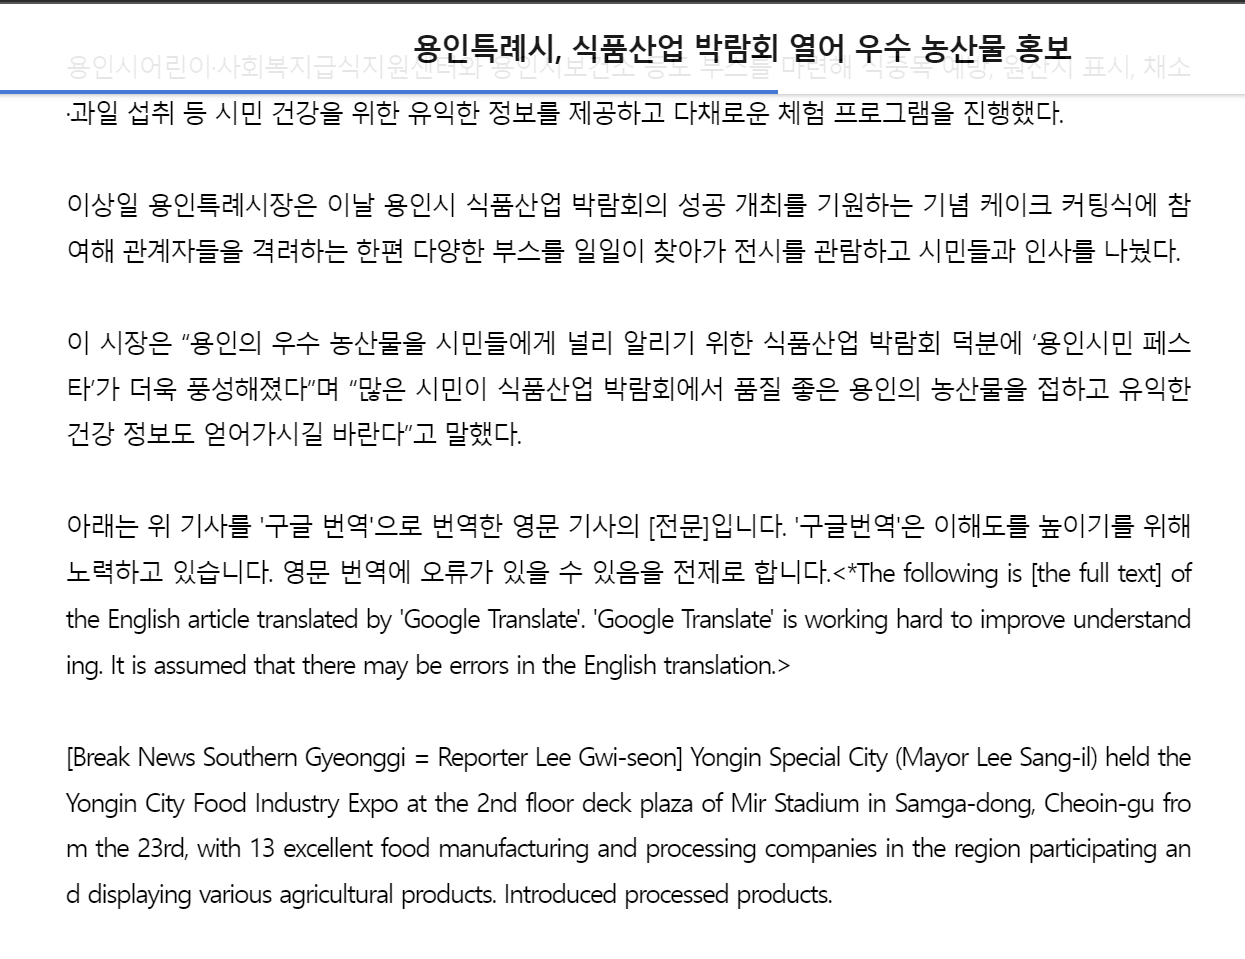

In [54]:
import re
from collections import Counter

# 불용어 제거
removed_keywords = []

def remove_invalid_keywords(keywords):
    pattern = re.compile(
        r'[A-Za-z]+[가-힣\u4E00-\u9FFF]+|'  # 영어+한글
        r'[0-9]+[가-힣\u4E00-\u9FFF]+|'     # 숫자+한글
        r'[0-9]+[A-Za-z]+|'                 # 숫자+영어
        r'[가-힣]+[A-Za-z\u4E00-\u9FFF]+|'  # 한글+영어
        r'[가-힣]+[0-9]+|'                  # 한글+숫자
        r'[A-Za-z]+[0-9]+|'                 # 영어+숫자
        r'[\u4E00-\u9FFF]+|'                # 한자
        r'[0-9]+(\.[0-9]+)?%|'              # 숫자+퍼센트
        r'[0-9]+|'                          # 숫자
        r'[A-Za-z]+'                        # 영어
    )
    valid_keywords = []
    for word in keywords.split(','):
        word = word.strip()
        if not word or pattern.match(word):  # 공백이거나 패턴에 맞는 단어 제거
            removed_keywords.append(word)
        else:
            valid_keywords.append(word)
    return ', '.join(valid_keywords)

# 원본 데이터에서 해당 키워드들을 제거
train_df['키워드'] = train_df['키워드'].apply(remove_invalid_keywords)
test_df['키워드'] = test_df['키워드'].apply(remove_invalid_keywords)

# 결과 출력
print("\n수정된 데이터프레임:")
print(train_df)

# 제거된 단어들 출력
print("\n제거된 단어들:")
print(removed_keywords[:10])


수정된 데이터프레임:
                ID        분류                                     제목  \
0      TRAIN_00000  문화:전시_공연  용인문화재단, 인문학 콘서트 ‘당신이 모르는 뮤지컬 이야기Ⅳ’ 개최   
1      TRAIN_00001        지역           용인 농촌테마파크, 7~8월 단체체험객 체험료 지원   
2      TRAIN_00002        지역        용인시, 노후주택 에너지 성능 개선 신청 18일까지 연장   
3      TRAIN_00003        지역        수원 용인 고양시,‘특례시’로 지정 도시경쟁력 증가 기대   
4      TRAIN_00004        국제      용인시, 스페인 미국 국제명예자문관 위촉 대외홍보 지원 역할   
...            ...       ...                                    ...   
54604  TRAIN_54604        국제  용인 아파트서 30대 여성, 아들 딸 함께 추락 "극단 선택 추정"   
54605  TRAIN_54605  사회:교육_시험                    용인시, '위탁부모 보수교육' 실시   
54606  TRAIN_54606        지역          용인시, '플랫폼 시티' 국토부에 사업인정 협의 신청   
54607  TRAIN_54607        지역      용인시 이동읍 주민자치위원회, 저소득 20가구에 밑반찬 지원   
54608  TRAIN_54608        지역                 용인시-용인시공무원노조, 국무총리상 수상   

                                                     키워드  
0      용인문화재단, 인문학, 콘서트, 뮤지컬, 이야기, 개최, 인문학, 콘서트, 뮤지컬,...  
1      용인, 농촌, 테

In [55]:
# 제거된 단어들의 빈도 계산 및 상위 20개 출력
keyword_counter = Counter(removed_keywords)
top_10_keywords = keyword_counter.most_common(20)

print("\n제거된 단어들 상위 20개:")
for keyword, count in top_10_keywords:
    print(f"{keyword}: {count}")


제거된 단어들 상위 20개:
코로나19: 20590
A씨: 13186
: 6711
1만: 6452
SK하이닉스: 5605
AI: 5203
1년: 4816
SK: 4717
GTX: 4244
LH: 4178
3년: 4033
2년: 3948
B씨: 3770
6월: 3516
1명: 3455
12월: 3437
7월: 3411
3일: 3389
3월: 3349
1억: 3275


In [20]:
# 제거된 단어들의 빈도 계산 및 상위 20개 출력
keyword_counter = Counter(removed_keywords)
top_10_keywords = keyword_counter.most_common(20)

print("\n제거된 단어들 상위 20개:")
for keyword, count in top_10_keywords:
    print(f"{keyword}: {count}")


제거된 단어들 상위 20개:
코로나19: 20593
A씨: 13186
Yongin: 11410
City: 7548
1만: 6452
city: 5862
: 5733
SK하이닉스: 5605
AI: 5271
Google: 5108
1년: 4816
SK: 4813
GTX: 4286
LH: 4246
Translate: 4229
Lee: 4053
3년: 4034
2년: 3950
Gyeonggi: 3859
B씨: 3770


## 대분류 기준으로 공통단어 제거

In [41]:
# '분류' 열에서 앞부분만 추출하여 '분류_대분류'라는 새로운 열에 저장
train_df['분류_대분류'] = train_df['분류'].apply(lambda x: x.split(':')[0])

# 결과 확인
train_df['분류_대분류'].value_counts()

지역       26950
경제       10534
사회        8245
정치        2521
문화        2500
스포츠       2035
IT_과학     1487
국제         337
Name: 분류_대분류, dtype: int64

In [42]:
len(train_df)

54609

In [43]:
from collections import Counter

def find_common_words_and_remove(num_categories=8, top_n=100, com_counts=10, train_df=train_df, test_df=test_df):
    # '분류_대분류'의 각 범주에 속하는 단어들을 추출
    category_words = {category: [] for category in train_df["분류_대분류"].unique()}

    for category in category_words.keys():
        words = train_df.loc[train_df["분류_대분류"] == category, "키워드"].apply(lambda x: x.split(',')).tolist()
        category_words[category] = [word for sublist in words for word in sublist]

    # 각 범주에 속하는 단어들을 카운팅
    word_counts = {category: Counter(words) for category, words in category_words.items()}

    # 지정된 범주 갯수에 속하는 단어들을 찾기
    common_words = set()
    for word in word_counts[list(word_counts.keys())[0]].keys():
        count = sum(1 for category in word_counts.keys() if word in word_counts[category] and word_counts[category][word] >= com_counts)
        if count == num_categories:
            common_words.add(word)

    # 지정된 범주 갯수에 속하는 단어와 그 갯수를 계산
    common_word_counts = {word: sum(word_counts[category][word] for category in word_counts.keys()) for word in common_words}

    # 단어들을 갯수 기준으로 정렬하고 상위 N개를 선택
    top_common_words = sorted(common_word_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    print(f"상위 {top_n}개의 단어 확인")

    # 상위 N개의 단어와 그 갯수, 그리고 각 범주에서의 갯수를 출력
    for word, total_count in top_common_words:
        category_counts = {category: word_counts[category][word] for category in word_counts.keys()}
        print(f"단어: {word}, 총 갯수: {total_count}, 각 범주에서의 갯수: {category_counts}")
        
    # 총 몇 개의 단어가 겹치는지 출력
    print(f"총 {len(common_words)}개의 단어가 겹칩니다.")

    # top_n 기준으로 겹치는 단어들을 '키워드' 열에서 제거하고 새로운 열에 저장
    top_common_words_set = set(word for word, _ in top_common_words)
    
    def remove_top_common_words(keywords):
        return ', '.join([word for word in keywords.split(',') if word not in top_common_words_set])

    train_df['키워드'] = train_df['키워드'].apply(remove_top_common_words)
    test_df['키워드'] = test_df['키워드'].apply(remove_top_common_words)

num_categories : 공통단어로 간주할 범주의 수  
top_n : 상위 N개의 공통 단어를 선택  
com_counts : 범주에서 단어가 공통 단어로 간주되기 위해 나타나야 하는 최소 횟수를 지정  

In [44]:
find_common_words_and_remove(num_categories=8, com_counts=100) # top_n은 default인 100 그대로 사용

상위 100개의 단어 확인
단어:  용인시, 총 갯수: 90837, 각 범주에서의 갯수: {'문화': 3623, '지역': 49126, '국제': 454, '정치': 3797, '경제': 17252, '사회': 11308, '스포츠': 2574, 'IT_과학': 2703}
단어:  용인, 총 갯수: 66002, 각 범주에서의 갯수: {'문화': 3296, '지역': 33648, '국제': 255, '정치': 3687, '경제': 19063, '사회': 3755, '스포츠': 1164, 'IT_과학': 1134}
단어:  지역, 총 갯수: 52122, 각 범주에서의 갯수: {'문화': 1356, '지역': 28468, '국제': 123, '정치': 3157, '경제': 12835, '사회': 5115, '스포츠': 171, 'IT_과학': 897}
단어:  시장, 총 갯수: 48669, 각 범주에서의 갯수: {'문화': 1619, '지역': 25448, '국제': 322, '정치': 4017, '경제': 13272, '사회': 2239, '스포츠': 798, 'IT_과학': 954}
단어:  경기도, 총 갯수: 43090, 각 범주에서의 갯수: {'문화': 1244, '지역': 24280, '국제': 124, '정치': 2241, '경제': 9083, '사회': 3823, '스포츠': 1743, 'IT_과학': 552}
단어:  경기, 총 갯수: 38839, 각 범주에서의 갯수: {'문화': 1052, '지역': 14922, '국제': 225, '정치': 2246, '경제': 9233, '사회': 7061, '스포츠': 3502, 'IT_과학': 598}
단어:  이날, 총 갯수: 17324, 각 범주에서의 갯수: {'문화': 744, '지역': 7712, '국제': 128, '정치': 1892, '경제': 2320, '사회': 3817, '스포츠': 506, 'IT_과학': 205}
단어:  상황, 총 갯수: 12505, 각 범주에서의 갯수: {'문화': 38

In [45]:
find_common_words_and_remove(num_categories=7, com_counts=300)

상위 100개의 단어 확인
단어:   진행, 총 갯수: 31408, 각 범주에서의 갯수: {'문화': 2177, '지역': 15948, '국제': 87, '정치': 950, '경제': 6311, '사회': 4322, '스포츠': 549, 'IT_과학': 1064}
단어:   관계자, 총 갯수: 22429, 각 범주에서의 갯수: {'문화': 704, '지역': 11936, '국제': 98, '정치': 590, '경제': 4986, '사회': 3042, '스포츠': 302, 'IT_과학': 771}
단어:   대표, 총 갯수: 14589, 각 범주에서의 갯수: {'문화': 1018, '지역': 4416, '국제': 43, '정치': 3203, '경제': 3088, '사회': 1376, '스포츠': 902, 'IT_과학': 543}
단어:   시작, 총 갯수: 13419, 각 범주에서의 갯수: {'문화': 1204, '지역': 5378, '국제': 72, '정치': 698, '경제': 3226, '사회': 1900, '스포츠': 372, 'IT_과학': 569}
총 4개의 단어가 겹칩니다.


In [46]:
from collections import Counter

def count_and_remove_low_occurrence_keywords(train_df, test_df, threshold=3):
    # '키워드' 열의 각 값을 쉼표로 분리하여 리스트로 변환
    train_df['키워드_리스트'] = train_df['키워드'].apply(lambda x: x.split(','))
    test_df['키워드_리스트'] = test_df['키워드'].apply(lambda x: x.split(','))

    # '분류_대분류' 별로 단어들을 추출하고 카운팅
    category_keywords = {category: [] for category in train_df["분류_대분류"].unique()}

    for category in category_keywords.keys():
        words = train_df.loc[train_df["분류_대분류"] == category, "키워드_리스트"].tolist()
        category_keywords[category] = [word.strip() for sublist in words for word in sublist if word.strip()]

    # 각 '분류_대분류' 별로 단어들을 카운팅하고 단어가 threshold 이하로 존재하는 경우를 찾기
    low_occurrence_words = set()
    for category, words in category_keywords.items():
        word_counts = Counter(words)
        low_occurrence_words.update({word for word, count in word_counts.items() if count <= threshold})

    # 단어가 threshold 이하로 존재하는 경우를 '키워드' 열에서 제거
    def remove_low_occurrence_words(keywords):
        return ', '.join([word.strip() for word in keywords.split(',') if word.strip() and word.strip() not in low_occurrence_words])

    train_df['키워드'] = train_df['키워드'].apply(remove_low_occurrence_words)

    # test_df에서도 동일한 단어를 제거
    def remove_low_occurrence_words_from_test(keywords):
        return ', '.join([word.strip() for word in keywords.split(',') if word.strip() and word.strip() not in low_occurrence_words])

    test_df['키워드'] = test_df['키워드'].apply(remove_low_occurrence_words_from_test)

    # 제거 후 각 '분류_대분류' 별로 하위 10개의 단어와 그 갯수를 출력
    for category in category_keywords.keys():
        words = train_df.loc[train_df["분류_대분류"] == category, "키워드"].apply(lambda x: x.split(',')).tolist()
        words = [word.strip() for sublist in words for word in sublist if word.strip()]
        word_counts = Counter(words)
        bottom_keywords = word_counts.most_common()[:-11:-1]
        print(f"분류_대분류: {category}")
        for word, count in bottom_keywords:
            print(f"  단어: {word}, 갯수: {count}")
        print()

# 함수 실행
count_and_remove_low_occurrence_keywords(train_df, test_df, threshold=2)

분류_대분류: 문화
  단어: 대상어, 갯수: 3
  단어: 우서일절, 갯수: 3
  단어: 오수경, 갯수: 3
  단어: 칠순잔치, 갯수: 3
  단어: 서병덕, 갯수: 3
  단어: 김옹, 갯수: 3
  단어: 위작, 갯수: 3
  단어: 용자봉, 갯수: 3
  단어: 곽승진, 갯수: 3
  단어: 독서율, 갯수: 3

분류_대분류: 지역
  단어: 온세미, 갯수: 3
  단어: 모멘트, 갯수: 3
  단어: 통합데이터센터, 갯수: 3
  단어: 통합데이터, 갯수: 3
  단어: 임의장, 갯수: 3
  단어: 강서대, 갯수: 3
  단어: 닭칼국수, 갯수: 3
  단어: 요금군, 갯수: 3
  단어: 나군, 갯수: 3
  단어: 이덕난, 갯수: 3

분류_대분류: 국제
  단어: 낭비, 갯수: 3
  단어: 조선인, 갯수: 3
  단어: 트럼프행정부, 갯수: 3
  단어: 아시아인들, 갯수: 3
  단어: 주씨, 갯수: 3
  단어: 호감도, 갯수: 3
  단어: 따오기, 갯수: 3
  단어: 윌리엄슨카운티, 갯수: 3
  단어: 패어펙스카운티, 갯수: 3
  단어: 오세올라카운티, 갯수: 3

분류_대분류: 정치
  단어: 법률비서관, 갯수: 3
  단어: 총괄부위원장, 갯수: 3
  단어: 열병식, 갯수: 3
  단어: 전봉학, 갯수: 3
  단어: 지방지, 갯수: 3
  단어: 수원갈비, 갯수: 3
  단어: 일탈행동, 갯수: 3
  단어: 독감, 갯수: 3
  단어: 한국여성유권자경기연맹, 갯수: 3
  단어: 베네피트, 갯수: 3

분류_대분류: 경제
  단어: 강만희, 갯수: 3
  단어: 갓슬라, 갯수: 3
  단어: 배민라이더스, 갯수: 3
  단어: 파워콜, 갯수: 3
  단어: 겨울옷, 갯수: 3
  단어: 점박이물범, 갯수: 3
  단어: 개선율, 갯수: 3
  단어: 철산자이더헤리티지, 갯수: 3
  단어: 고립은둔청년, 갯수: 3
  단어: 용인마평, 갯수: 3

분류_대분류: 사회
  단어: 말벌, 갯수: 3
  단어: 숙행, 갯수

In [47]:
# # 함수 실행
# count_and_remove_low_occurrence_keywords(train_df, test_df, threshold=3)

분류_대분류: 문화
  단어: 똘똘, 갯수: 4
  단어: 민관식, 갯수: 4
  단어: 소강실, 갯수: 4
  단어: 영산수련원, 갯수: 4
  단어: 숙영지, 갯수: 4
  단어: 춤판, 갯수: 4
  단어: 본존불, 갯수: 4
  단어: 공렴, 갯수: 4
  단어: 호저집, 갯수: 4
  단어: 박제가, 갯수: 4

분류_대분류: 지역
  단어: 통행거리, 갯수: 4
  단어: 마케팅지수, 갯수: 4
  단어: 온리원, 갯수: 4
  단어: 택시요금체계, 갯수: 4
  단어: 하태권, 갯수: 4
  단어: 북부도시계획도, 갯수: 4
  단어: 춘천해냄대학, 갯수: 4
  단어: 산업혁명센터, 갯수: 4
  단어: 지휘기, 갯수: 4
  단어: 항로변경, 갯수: 4

분류_대분류: 국제
  단어: 위어, 갯수: 4
  단어: 총기사건, 갯수: 4
  단어: 디자인, 갯수: 4
  단어: 진위현, 갯수: 4
  단어: 장소정체성, 갯수: 4
  단어: 역사문화자산, 갯수: 4
  단어: 진다바드, 갯수: 4
  단어: 성접대, 갯수: 4
  단어: 영웅, 갯수: 4
  단어: 연수단, 갯수: 4

분류_대분류: 정치
  단어: 정태인, 갯수: 4
  단어: 달째, 갯수: 4
  단어: 현영석, 갯수: 4
  단어: 은현, 갯수: 4
  단어: 균형발전책, 갯수: 4
  단어: 보행신호등, 갯수: 4
  단어: 경제수, 갯수: 4
  단어: 용전추, 갯수: 4
  단어: 용인전철추진위원회, 갯수: 4
  단어: 재이첩, 갯수: 4

분류_대분류: 경제
  단어: 요즈마코리아, 갯수: 4
  단어: 위메프오, 갯수: 4
  단어: 봉공, 갯수: 4
  단어: 브리타, 갯수: 4
  단어: 평구로지스, 갯수: 4
  단어: 온비드, 갯수: 4
  단어: 트리뷰하우스, 갯수: 4
  단어: 트리뷰, 갯수: 4
  단어: 배액배, 갯수: 4
  단어: 아크로서울포레스트, 갯수: 4

분류_대분류: 사회
  단어: 통합상담소, 갯수: 4
  단어: 일반상담소, 갯수: 

In [12]:
# # '키워드' 열의 모든 단어들을 리스트로 모으기
# all_keywords = []
# train_df['키워드'].apply(lambda x: all_keywords.extend(x.split(',')))

# # 모든 단어들의 빈도 계산
# keyword_counts = pd.Series(all_keywords).value_counts()

# # 갯수가 1개 이하인 키워드들 필터링
# low_frequency_keywords = keyword_counts[keyword_counts <= 1].index.tolist()
# print("\n갯수가 1개 이하인 키워드들:")
# low_frequency_keywords

In [13]:
# # '증오'가 정확히 일치하는 행 필터링
# filtered_df = train_df[train_df['키워드'].str.contains(r'\b증오\b', na=False)]

# # 결과 출력
# filtered_df.iloc[3]['키워드']

'이재명, 큰절, 눈물, 상처, 이재명, 더불어민주당, 대선, 후보, 연일, 반성, 사죄, 자신, 약점, 도덕성, 민주당, 사과, 중도층, 지지, 대선, 최대, 분기점, 연휴, 후보, 상태, 지지율, 정체, 타개, 위기감, 작용, 후보, 경기, 성남, 상대원, 시장, 자신, 유년기, 시절, 언급, 눈물, 자리, 이낙연, 민주당, 대표, 동행, 후보, 초등학교, 산꼭대기, 어머니, 화장실, 출근, 공장, 행복, 눈시울, 후보, 아버지, 시장, 청소, 노동자, 어머니, 시장, 공중, 화장실, 이용자, 소변, 대변, 설명, 화장실, 아들, 어머니, 거짓말, 판검사, 실력, 변호사, 노력, 자리, 상처, 토로, 후보, 형수, 욕설, 가족, 논란, 고개, 민주당, 반성, 강조, 후보, 경기, 용인시, 경기도, 공약, 윤호중, 원내, 대표, 민주당, 의원, 예정, 큰절, 후보, 사죄, 큰절, 후보, 민주당, 개혁, 진보, 세력, 핵심, 가치, 공정, 측면, 부족, 국민들, 남불, 질책, 생각, 관계자, 민주당, 선대위, 선대위, 현상, 지지율, 정체, 위기의식, 후보, 차원, 설명, 후보, 국민, 주장, 세대포위론, 적극, 반박, 세대포용, 세대포위론, 전폭적, 지지, 부모, 세대, 지지, 전략, 후보, 경기, 유세, 국민, 겨냥, 염장, 이익, 타인, 고통, 강요, 분열, 증오, 이용, 포위, 세대포위론, 비판, 박재현'

In [14]:
# # '키워드' 열의 모든 단어들을 리스트로 모으기
# all_keywords = []
# train_df['키워드'].apply(lambda x: all_keywords.extend(x.split(',')))

# # 모든 단어들의 빈도 계산
# keyword_counts = pd.Series(all_keywords).value_counts()

# # 갯수가 2개 이하인 키워드들 필터링
# low_frequency_keywords = keyword_counts[keyword_counts == 2].index.tolist()
# print("\n갯수가 2개인 키워드들:")
# low_frequency_keywords

In [159]:
# import pandas as pd

# # '키워드' 열의 모든 단어들을 리스트로 모으기
# all_keywords = []
# train_df['키워드'].apply(lambda x: all_keywords.extend(x.split(',')))

# # 모든 단어들의 빈도 계산
# keyword_counts = pd.Series(all_keywords).value_counts()

# # 갯수가 1개 이하인 키워드들 필터링
# low_frequency_keywords = keyword_counts[keyword_counts <= 1].index.tolist()
# print("\n갯수가 1개 이하인 키워드들:")
# print(low_frequency_keywords)

# # 갯수가 1개 이하인 키워드들을 제거하는 함수
# def remove_low_frequency_keywords(keywords):
#     valid_keywords = [word.strip() for word in keywords.split(',') if word.strip() not in low_frequency_keywords]
#     return ', '.join(valid_keywords)

# # 원본 데이터에서 해당 키워드들을 제거
# train_df['키워드'] = train_df['키워드'].apply(remove_low_frequency_keywords)
# test_df['키워드'] = test_df['키워드'].apply(remove_low_frequency_keywords)

# # 결과 출력
# print("\n수정된 데이터프레임:")
# print(train_df)


갯수가 1개 이하인 키워드들:
['서정욱', '인물', ' 영화인파', '유소녀', '삼중고', '문의', '코치', '토리', '임상', '이대영', '불광', '외출', '대박난', '로뎀교회', '케이에스씨건설', '잡오프', '오션센트럴비즈', '관광업계', '우송정보대학', '제주의용소방대', '반등거래', '작물', '안동', '씨케이솔루션', '공용', '신규직원들', '식용유', '원활', '입단식', '국방위', '가스공사', ' 보이스톡', '랩지노믹스', '인싸', '김희겸', '애교', '도안리버파크', '하락률', ' 건설시행사', '사유', '권재형', '건설시행사', '보이스톡', '물벼락', '강만희', '폭발사고', '박만섭', '실버', '엔씽', '진안군', '독특', '상대원', '본드', '식별', '평생학습도시', '통상촉진단', '송주법', '까사펠리체', '어린이놀이터', '경기환경에너지진흥원', '로피', '집주인들', '특허출원', '물류창고', '정암교회', '기자실', '증량', '청계천', '북수원자', '적폐', ' 공압프레스', '제시', '사법입원제', '신광교', '초록', '동해', '만화', '착시', '남북', '체조', '로고', '대로', '경기도지체장애인협회', '복도창고', '톡신전쟁', '포괄임금', '논리', '견적', '교섭', '공압프레스', '유해란', '빈민촌', '매봉숲', '용인시대회', '팔당상수원', '교원그룹', '박정희', '볼트크리에이션', '다중', '직전', '승부사', '유로스카이', ' 용인서부', '산림치유', '명랑인문학', ' 문정자', '삼성그룹', '문정자', '무인계산대', '에이스건설', '경제기업', '지석묘', '중고차업', '강의동', '수지롯데몰점', '홀몸노인', '긴장', '첨단학과', '기업형', ' 첨단학과', '골든', '영통입구사거리역', '동대문', '한수원', '안순철', '겸직', '관광박람회', '디브릿지', '윤성찬',

In [ ]:
# import pandas as pd

# # '키워드' 열의 모든 단어들을 리스트로 모으기
# all_keywords = []
# train_df['키워드'].apply(lambda x: all_keywords.extend(x.split(',')))

# # 모든 단어들의 빈도 계산
# keyword_counts = pd.Series(all_keywords).value_counts()

# # 갯수가 2개인 키워드들 필터링
# low_frequency_keywords = keyword_counts[keyword_counts == 2].index.tolist()
# print("\n갯수가 2개인 키워드들:")
# print(low_frequency_keywords)

# # 갯수가 2개인 키워드들을 제거하는 함수
# def remove_low_frequency_keywords(keywords):
#     valid_keywords = [word.strip() for word in keywords.split(',') if word.strip() not in low_frequency_keywords]
#     return ', '.join(valid_keywords)

# # 원본 데이터에서 해당 키워드들을 제거
# train_df['키워드'] = train_df['키워드'].apply(remove_low_frequency_keywords)
# test_df['키워드'] = test_df['키워드'].apply(remove_low_frequency_keywords)

# # 결과 출력
# print("\n수정된 데이터프레임:")
# print(train_df)